# Trablho de Conclusão de Curso - UNIVESP - 1S/2025- Notebook1

# Código: tcc530-sala-002grupo-002

## 1.0 Packges

### Packges Import

In [1]:
# Packages

# Bibliotecas Gerais
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
import sys
import time
from scipy                     import stats

#Bibliotecas de Regressão
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model    import SGDRegressor
from sklearn.ensemble        import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# Bibliotecas de Clusterização
import scipy.cluster.hierarchy as shc
from sklearn.cluster           import KMeans
from sklearn.metrics           import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.mixture           import GaussianMixture
from sklearn.neural_network    import MLPRegressor
from sklearn.metrics           import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection   import GridSearchCV
from sklearn.model_selection   import RandomizedSearchCV
from sklearn.neighbors         import NearestNeighbors
from sklearn.cluster           import DBSCAN
from sklearn.cluster           import AgglomerativeClustering

# Bibliotecas Classificação
from sklearn                       import metrics
from sklearn.preprocessing         import MinMaxScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.svm                   import SVC
from sklearn.neural_network        import MLPClassifier
from sklearn.metrics               import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import ConfusionMatrixDisplay
from sklearn.metrics               import RocCurveDisplay

# Bibliotecas de Recomendação
from sklearn.metrics.pairwise      import cosine_similarity

# Redução de Dimensionalidade
from sklearn.decomposition         import PCA
from sklearn.decomposition         import TruncatedSVD

### Packges Version Control

In [2]:
pip freeze --local > ../requeriments.txt

Note: you may need to restart the kernel to use updated packages.


## 2.0 Data Read

In [3]:
link   = '../dados/dados_filtrados_2014.csv'
df2014 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2015.csv'
df2015 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2016.csv'
df2016 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2017.csv'
df2017 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2018.csv'
df2018 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2019.csv'
df2019 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2020.csv'
df2020 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2021.csv'
df2021 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2022.csv'
df2022 = pd.read_csv(link,sep=",")

link   = '../dados/dados_filtrados_2023.csv'
df2023 = pd.read_csv(link,sep=",")

/tmp/ipykernel_71906/1855454533.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2014 = pd.read_csv(link,sep=",")
/tmp/ipykernel_71906/1855454533.py:5: DtypeWarning: Columns (44,85,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df2015 = pd.read_csv(link,sep=",")
/tmp/ipykernel_71906/1855454533.py:8: DtypeWarning: Columns (6,10,18,22,44,45,46,54,64,68,74,85,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df2016 = pd.read_csv(link,sep=",")
/tmp/ipykernel_71906/1855454533.py:11: DtypeWarning: Columns (46,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df2017 = pd.read_csv(link,sep=",")
/tmp/ipykernel_71906/1855454533.py:14: DtypeWarning: Columns (45,46,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df2018 = pd.read_csv(link,sep=",")
/tmp/ipykernel_71906/1855454533.py:17: DtypeWarning: Columns (44

## 3.0 Data Join

In [4]:
df2021 = df2021.rename(columns={"ANO_NASC": "DT_NASC"})
df2022 = df2022.rename(columns={"ANO_NASC": "DT_NASC"})
df2023 = df2023.rename(columns={"ANO_NASC": "DT_NASC"})

In [5]:
df_full = pd.concat([df2014, df2015,df2016,df2017,df2018,df2019,df2020,df2021,df2022,df2023], axis=0, ignore_index=True)

In [6]:
def verificacao_nulos(df_true,target_clean,col_ok):

  df = df_true.copy()

  target_clean_por = 100*target_clean

  names_df  = df.columns
  nnames_df = len(names_df)
  porcent_df_null = df.isnull().sum()/df.shape[0]

  for i in range(0,nnames_df):
    
      if(porcent_df_null[i]>target_clean):

          print('A feature %s possui mais do que %.2f porcento de dados nulos'%(names_df[i],target_clean_por))

      else:

          col_ok.append(names_df[i])
          

In [7]:
target_clean = 0.5
col_ok       = []
verificacao_nulos(df_full,target_clean,col_ok)

A feature ID_OCUPA_N possui mais do que 50.00 porcento de dados nulos
A feature DT_CHIK_S1 possui mais do que 50.00 porcento de dados nulos
A feature DT_CHIK_S2 possui mais do que 50.00 porcento de dados nulos
A feature DT_PRNT possui mais do que 50.00 porcento de dados nulos
A feature RES_CHIKS1 possui mais do que 50.00 porcento de dados nulos
A feature RES_CHIKS2 possui mais do que 50.00 porcento de dados nulos
A feature RESUL_PRNT possui mais do que 50.00 porcento de dados nulos
A feature DT_SORO possui mais do que 50.00 porcento de dados nulos
A feature DT_NS1 possui mais do que 50.00 porcento de dados nulos
A feature DT_VIRAL possui mais do que 50.00 porcento de dados nulos
A feature DT_PCR possui mais do que 50.00 porcento de dados nulos
A feature SOROTIPO possui mais do que 50.00 porcento de dados nulos
A feature DT_INTERNA possui mais do que 50.00 porcento de dados nulos
A feature UF possui mais do que 50.00 porcento de dados nulos
A feature MUNICIPIO possui mais do que 50.00 p

/tmp/ipykernel_71906/923589582.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(porcent_df_null[i]>target_clean):


In [8]:
df_clean = df_full[col_ok].dropna(axis=0).reset_index(drop=True)
df_clean.head(5)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_ENCERRA,TP_SISTEMA,CS_FLXRET
0,2,A90,2017-01-24,201704.0,2017,35,354990,1351.0,3507157.0,2017-01-21,...,4.0,4.0,4.0,2.0,10.0,1.0,1.0,2017-01-24,2.0,1.0
1,2,A90,2017-07-12,201728.0,2017,35,355030,1331.0,2080818.0,2017-06-11,...,4.0,4.0,4.0,2.0,10.0,2.0,1.0,2017-09-11,2.0,1.0
2,2,A90,2017-01-29,201705.0,2017,35,352390,1353.0,2085437.0,2017-01-28,...,4.0,4.0,4.0,2.0,5.0,2.0,1.0,2017-04-10,2.0,1.0
3,2,A90,2017-03-27,201713.0,2017,35,351870,1349.0,6885284.0,2017-03-15,...,4.0,4.0,4.0,2.0,5.0,1.0,1.0,2017-05-22,2.0,1.0
4,2,A90,2017-01-23,201704.0,2017,35,350280,1336.0,2043890.0,2017-01-23,...,4.0,4.0,4.0,2.0,5.0,1.0,1.0,2017-01-31,2.0,1.0


In [9]:
reduct = 100*(1-(df_clean.shape[0]/df_full.shape[0]))
print('Full Size: %d'%df_full.shape[0])
print('Clean Size: %d'%df_clean.shape[0])
print('Reduction in Size: %f'%reduct)

Full Size: 4199371
Clean Size: 552333
Reduction in Size: 86.847245


In [10]:
df_clean.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI', 'SEM_PRI',
       'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS',
       'DT_INVEST', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO',
       'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA',
       'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES',
       'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT',
       'AUTO_IMUNE', 'RESUL_SORO', 'RESUL_NS1', 'RESUL_VI_N', 'RESUL_PCR_',
       'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'CLASSI_FIN', 'CRITERIO',
       'EVOLUCAO', 'DT_ENCERRA', 'TP_SISTEMA', 'CS_FLXRET'],
      dtype='object')

In [11]:
df_clean = df_clean.ffill()

/tmp/ipykernel_71906/814116313.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.ffill()


In [ ]:
target_clean = 0.5
col_ok       = []
verificacao_nulos(df_clean,target_clean,col_ok)

In [12]:
link   = '../dados/municipios_sp_edited.csv'
df_muni_sp = pd.read_csv(link,sep=",")
df_muni_sp = df_muni_sp.drop(['ID_ESTADO','ESTADO'],axis=1)
df_muni_sp.head()

,REGIAO,MUNICIPIO,ID_MUNICIPIO
0,Presidente Prudente,Adamantina,350010
1,São José do Rio Preto,Adolfo,350020
2,Campinas,Aguaí,350030
3,Campinas,Águas da Prata,350040
4,Campinas,Águas de Lindóia,350050


In [13]:
df_muni_sp = df_muni_sp.rename(columns={"ID_MUNICIPIO": "ID_MUNICIP"})

In [14]:
df_clean = df_clean.merge(df_muni_sp,on=['ID_MUNICIP'])
df_clean.head(5)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,IMUNOH_N,HOSPITALIZ,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_ENCERRA,TP_SISTEMA,CS_FLXRET,REGIAO,MUNICIPIO
0,2,A90,2017-01-24,201704.0,2017,35,354990,1351.0,3507157.0,2017-01-21,...,4.0,2.0,10.0,1.0,1.0,2017-01-24,2.0,1.0,São José dos Campos,São José dos Campos
1,2,A90,2017-07-12,201728.0,2017,35,355030,1331.0,2080818.0,2017-06-11,...,4.0,2.0,10.0,2.0,1.0,2017-09-11,2.0,1.0,São Paulo,São Paulo
2,2,A90,2017-01-29,201705.0,2017,35,352390,1353.0,2085437.0,2017-01-28,...,4.0,2.0,5.0,2.0,1.0,2017-04-10,2.0,1.0,Sorocaba,Itu
3,2,A90,2017-03-27,201713.0,2017,35,351870,1349.0,6885284.0,2017-03-15,...,4.0,2.0,5.0,1.0,1.0,2017-05-22,2.0,1.0,São Paulo,Guarujá
4,2,A90,2017-01-23,201704.0,2017,35,350280,1336.0,2043890.0,2017-01-23,...,4.0,2.0,5.0,1.0,1.0,2017-01-31,2.0,1.0,Araçatuba,Araçatuba


In [15]:
df_clean.dtypes

TP_NOT          int64
ID_AGRAVO      object
DT_NOTIFIC     object
SEM_NOT       float64
NU_ANO          int64
SG_UF_NOT       int64
ID_MUNICIP      int64
ID_REGIONA    float64
ID_UNIDADE    float64
DT_SIN_PRI     object
SEM_PRI         int64
DT_NASC        object
NU_IDADE_N    float64
CS_SEXO        object
CS_GESTANT    float64
CS_RACA       float64
CS_ESCOL_N    float64
SG_UF         float64
ID_MN_RESI    float64
ID_RG_RESI    float64
ID_PAIS       float64
DT_INVEST      object
FEBRE         float64
MIALGIA       float64
CEFALEIA      float64
EXANTEMA      float64
VOMITO        float64
NAUSEA        float64
DOR_COSTAS    float64
CONJUNTVIT    float64
ARTRITE       float64
ARTRALGIA     float64
PETEQUIA_N    float64
LEUCOPENIA    float64
LACO          float64
DOR_RETRO     float64
DIABETES      float64
HEMATOLOG     float64
HEPATOPAT     float64
RENAL         float64
HIPERTENSA    float64
ACIDO_PEPT    float64
AUTO_IMUNE    float64
RESUL_SORO    float64
RESUL_NS1     float64
RESUL_VI_N

In [16]:
df_clean['DT_NASC_YEAR'] = pd.DatetimeIndex(df_clean['DT_NASC']).year
df_clean = df_clean.drop(['DT_NASC'],axis=1)

df_clean['DT_NOTIFIC']   = pd.to_datetime(df_clean['DT_NOTIFIC'])
df_clean['DT_SIN_PRI']   = pd.to_datetime(df_clean['DT_SIN_PRI'])
df_clean['DT_NASC_YEAR'] = pd.to_datetime(df_clean['DT_NASC_YEAR'])
df_clean['DT_INVEST']    = pd.to_datetime(df_clean['DT_INVEST'])
df_clean['DT_ENCERRA']   = pd.to_datetime(df_clean['DT_ENCERRA'])

df_clean['REGIAO']     = df_clean['REGIAO'].astype('category')
df_clean['MUNICIPIO']  = df_clean['MUNICIPIO'].astype('category')
df_clean['ID_AGRAVO']  = df_clean['ID_AGRAVO'].astype('category')
df_clean['ID_MUNICIP'] = df_clean['ID_MUNICIP'].astype('category')
df_clean['ID_REGIONA'] = df_clean['ID_REGIONA'].astype('category')
df_clean['ID_UNIDADE'] = df_clean['ID_UNIDADE'].astype('category')
df_clean['ID_MN_RESI'] = df_clean['ID_MN_RESI'].astype('category')
df_clean['ID_RG_RESI'] = df_clean['ID_RG_RESI'].astype('category')
df_clean['ID_PAIS']    = df_clean['ID_PAIS'].astype('category')
df_clean['CS_SEXO']    = df_clean['CS_SEXO'].astype('category')

df_clean['SEM_PRI']    = df_clean['SEM_PRI'].astype('float')
df_clean['ID_MN_RESI'] = df_clean['ID_MN_RESI'].astype('float')

In [17]:
df_clean.dtypes

TP_NOT                   int64
ID_AGRAVO             category
DT_NOTIFIC      datetime64[ns]
SEM_NOT                float64
NU_ANO                   int64
SG_UF_NOT                int64
ID_MUNICIP            category
ID_REGIONA            category
ID_UNIDADE            category
DT_SIN_PRI      datetime64[ns]
SEM_PRI                float64
NU_IDADE_N             float64
CS_SEXO               category
CS_GESTANT             float64
CS_RACA                float64
CS_ESCOL_N             float64
SG_UF                  float64
ID_MN_RESI             float64
ID_RG_RESI            category
ID_PAIS               category
DT_INVEST       datetime64[ns]
FEBRE                  float64
MIALGIA                float64
CEFALEIA               float64
EXANTEMA               float64
VOMITO                 float64
NAUSEA                 float64
DOR_COSTAS             float64
CONJUNTVIT             float64
ARTRITE                float64
ARTRALGIA              float64
PETEQUIA_N             float64
LEUCOPEN

In [18]:
muni_list = df_clean['MUNICIPIO'].unique().tolist()

In [19]:
regiao_list = df_clean['REGIAO'].unique().tolist()

In [20]:
df_clean.groupby(['REGIAO'])['RESUL_SORO'].sum()

/tmp/ipykernel_71906/2511805506.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(['REGIAO'])['RESUL_SORO'].sum()


REGIAO
Araraquara               138123.0
Araçatuba                109625.0
Bauru                    205259.0
Campinas                 216132.0
Marília                   75595.0
Presidente Prudente      219681.0
Ribeirão Preto           187585.0
Sorocaba                  47290.0
São José do Rio Preto    236508.0
São José dos Campos       66583.0
São Paulo                138117.0
Name: RESUL_SORO, dtype: float64

In [22]:
df_clean.groupby(['MUNICIPIO'])['RESUL_SORO'].sum()

/tmp/ipykernel_71906/798060027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(['MUNICIPIO'])['RESUL_SORO'].sum()


MUNICIPIO
Adamantina            12008.0
Adolfo                  151.0
Aguaí                  3577.0
Agudos                 5968.0
Alambari                 41.0
                       ...   
Águas de São Pedro      117.0
Álvares Florence         75.0
Álvares Machado         989.0
Álvaro de Carvalho       39.0
Óleo                      4.0
Name: RESUL_SORO, Length: 563, dtype: float64

## 4.0 Data Transform

### 4.1 Save Clean Data Set

In [23]:
link = '../dados/df_clean.csv'
df_clean.to_csv(link,sep=',',index=False)

## 5.0 Exploratory Data Analysis

In [24]:
df_clean.describe()

,TP_NOT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,DT_SIN_PRI,SEM_PRI,NU_IDADE_N,CS_GESTANT,CS_RACA,...,HISTOPA_N,IMUNOH_N,HOSPITALIZ,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_ENCERRA,TP_SISTEMA,CS_FLXRET,DT_NASC_YEAR
count,552333.0,552333,552333.000000,552333.000000,552333.0,552333,552333.000000,552333.000000,552333.000000,552333.000000,...,552333.000000,552333.000000,552333.000000,552333.000000,552333.000000,552333.000000,552333,552333.0,552333.000000,552333
mean,2.0,2020-04-07 22:23:35.628615680,202011.412492,2019.930448,35.0,2020-03-25 19:51:41.231322624,202008.307387,4020.608711,5.781235,2.888667,...,3.996026,3.994927,2.117703,8.421003,1.436056,1.163425,2020-05-07 18:35:11.495782144,2.0,0.430481,1970-01-01 00:00:00.000001979
min,2.0,2017-01-01 00:00:00,201701.000000,2017.000000,35.0,1936-11-24 00:00:00,193648.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2017-01-02 00:00:00,2.0,0.000000,1970-01-01 00:00:00.000001902
25%,2.0,2019-03-13 00:00:00,201911.000000,2019.000000,35.0,2019-03-08 00:00:00,201910.000000,4020.000000,5.000000,1.000000,...,4.000000,4.000000,2.000000,5.000000,1.000000,1.000000,2019-04-08 00:00:00,2.0,0.000000,1970-01-01 00:00:00.000001970
50%,2.0,2019-05-10 00:00:00,201919.000000,2019.000000,35.0,2019-05-05 00:00:00,201919.000000,4034.000000,6.000000,1.000000,...,4.000000,4.000000,2.000000,10.000000,1.000000,1.000000,2019-06-12 00:00:00,2.0,0.000000,1970-01-01 00:00:00.000001973
75%,2.0,2023-02-22 00:00:00,202308.000000,2023.000000,35.0,2023-02-17 00:00:00,202307.000000,4050.000000,6.000000,4.000000,...,4.000000,4.000000,2.000000,10.000000,2.000000,1.000000,2023-03-10 00:00:00,2.0,1.000000,1970-01-01 00:00:00.000001993
max,2.0,2023-12-30 00:00:00,202352.000000,2023.000000,35.0,2023-12-30 00:00:00,202352.000000,4116.000000,9.000000,9.000000,...,4.000000,4.000000,9.000000,12.000000,3.000000,9.000000,2024-05-21 00:00:00,2.0,1.000000,1970-01-01 00:00:00.000002019
std,0.0,NaN,196.691464,1.978949,0.0,NaN,220.108076,151.482513,1.016749,2.933805,...,0.094862,0.100852,1.036854,2.337692,0.496241,1.120920,NaN,0.0,0.495144,NaN


In [25]:
df_numeric = df_clean.select_dtypes(include='number')

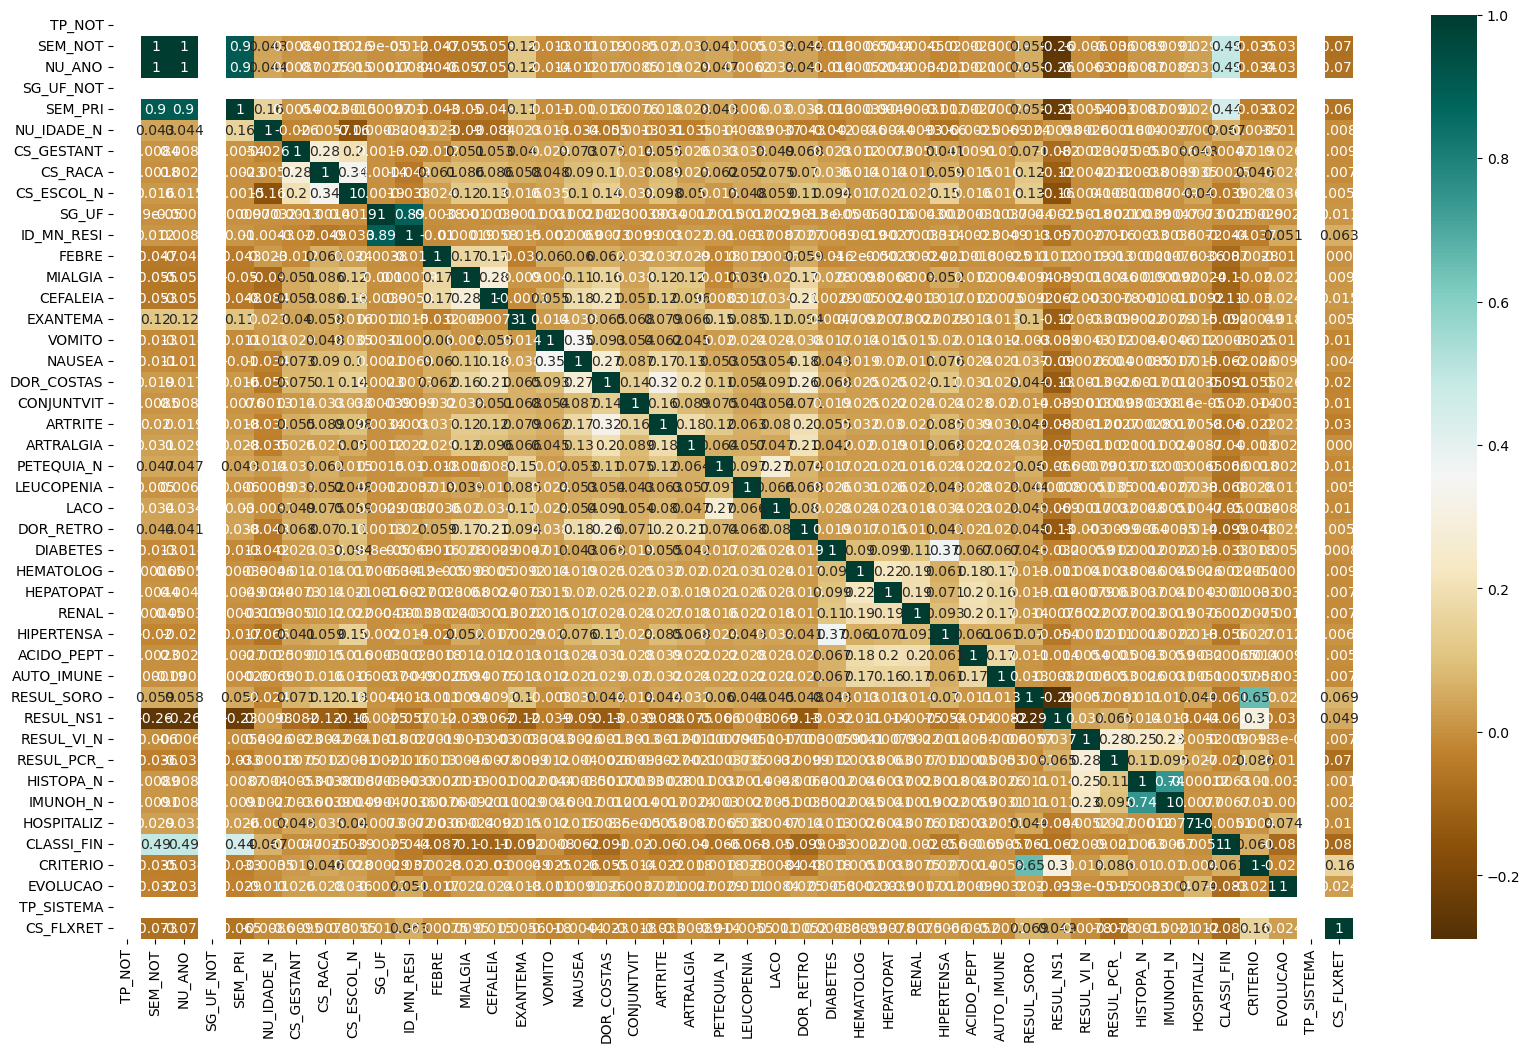

In [26]:
plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(), annot=True,cmap='BrBG')
plt.show()
plt.close()

In [27]:
corr_matrix = df_numeric.corr()
corr_matrix

,TP_NOT,SEM_NOT,NU_ANO,SG_UF_NOT,SEM_PRI,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,...,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,HOSPITALIZ,CLASSI_FIN,CRITERIO,EVOLUCAO,TP_SISTEMA,CS_FLXRET
TP_NOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEM_NOT,NaN,1.000000,0.998444,NaN,0.901254,0.042571,0.008445,0.001813,0.015980,0.000029,...,-0.006009,-0.035922,0.008886,0.009118,0.029188,0.489135,-0.035252,-0.031660,NaN,-0.072586
NU_ANO,NaN,0.998444,1.000000,NaN,0.899946,0.043788,0.008695,0.002530,0.015213,-0.000167,...,-0.006318,-0.035722,0.008674,0.008927,0.030655,0.493800,-0.033962,-0.034906,NaN,-0.070789
SG_UF_NOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEM_PRI,NaN,0.901254,0.899946,NaN,1.000000,0.158236,0.005394,0.002333,0.001534,-0.000975,...,-0.005403,-0.033199,0.008724,0.009098,0.026286,0.441682,-0.032516,-0.029292,NaN,-0.065256
NU_IDADE_N,NaN,0.042571,0.043788,NaN,0.158236,1.000000,-0.026032,-0.005743,-0.155533,0.000323,...,0.002612,-0.000177,0.003963,0.002652,-0.001986,0.066653,-0.003505,-0.011297,NaN,-0.008633
CS_GESTANT,NaN,0.008445,0.008695,NaN,0.005394,-0.026032,1.000000,0.277046,0.201941,0.001268,...,-0.002289,0.007521,-0.005260,-0.003566,0.047604,-0.004670,0.019374,0.026188,NaN,-0.009500
CS_RACA,NaN,0.001813,0.002530,NaN,0.002333,-0.005743,0.277046,1.000000,0.335668,-0.001433,...,-0.004237,0.012358,-0.003776,-0.003861,0.035026,0.002522,0.045690,0.027931,NaN,-0.007753
CS_ESCOL_N,NaN,0.015980,0.015213,NaN,0.001534,-0.155533,0.201941,0.335668,1.000000,0.001850,...,-0.004097,0.008094,-0.000873,0.000490,0.039687,-0.039262,0.027712,0.035639,NaN,0.005527
SG_UF,NaN,0.000029,-0.000167,NaN,-0.000975,0.000323,0.001268,-0.001433,0.001850,1.000000,...,-0.001827,-0.002083,0.000392,0.000470,0.007334,-0.002530,0.000287,-0.002189,NaN,0.010755


<Figure size 2000x2000 with 0 Axes>

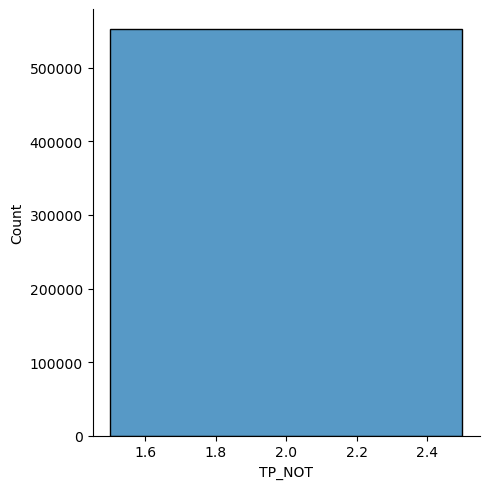

<Figure size 2000x2000 with 0 Axes>

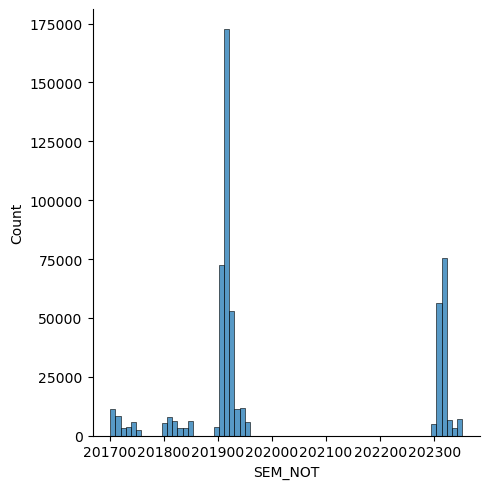

<Figure size 2000x2000 with 0 Axes>

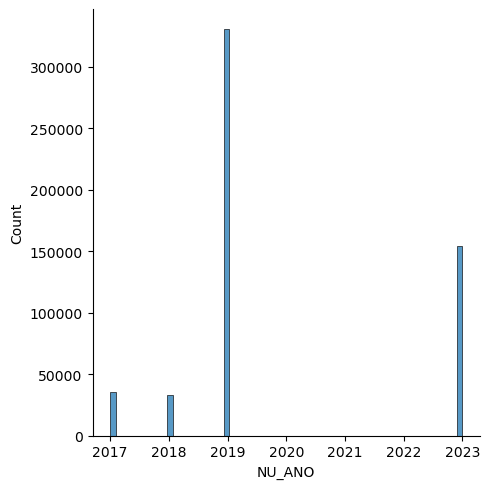

<Figure size 2000x2000 with 0 Axes>

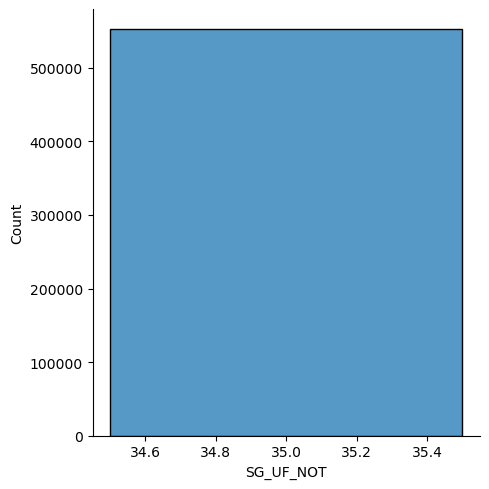

<Figure size 2000x2000 with 0 Axes>

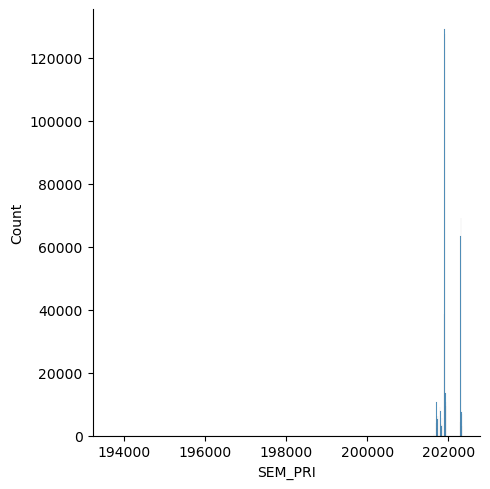

<Figure size 2000x2000 with 0 Axes>

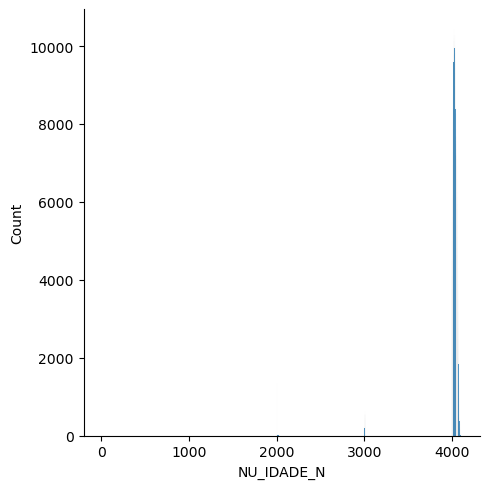

<Figure size 2000x2000 with 0 Axes>

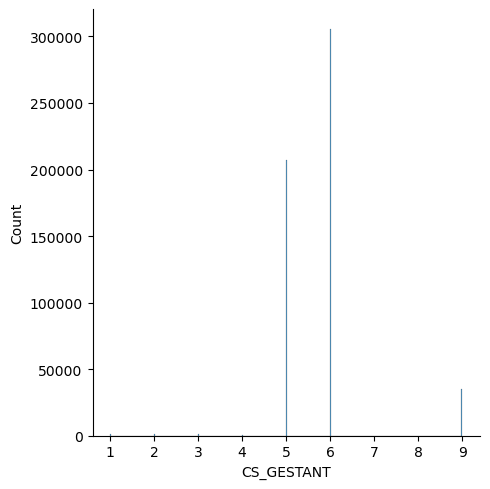

<Figure size 2000x2000 with 0 Axes>

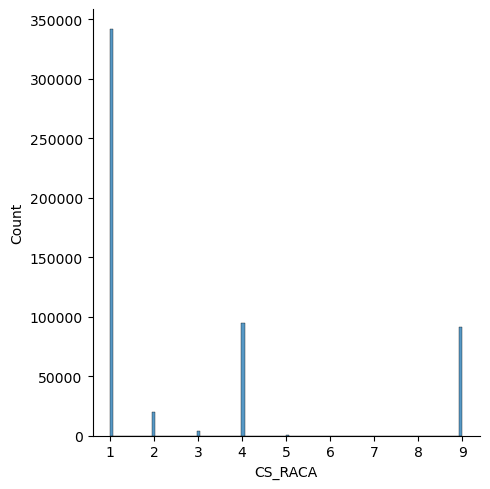

<Figure size 2000x2000 with 0 Axes>

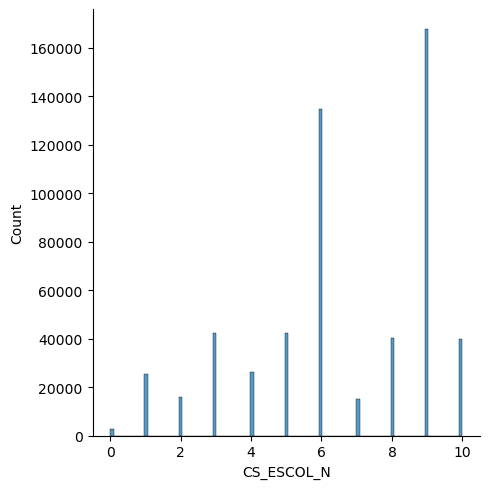

<Figure size 2000x2000 with 0 Axes>

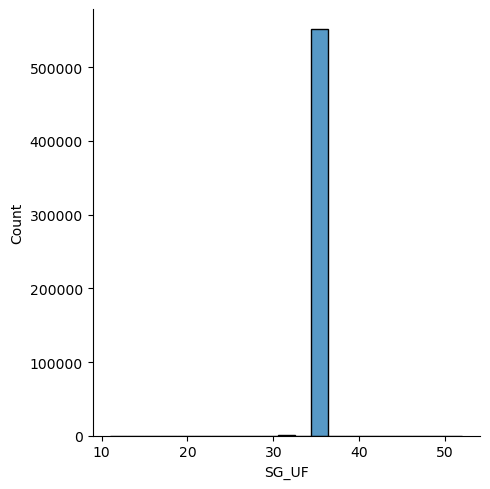

<Figure size 2000x2000 with 0 Axes>

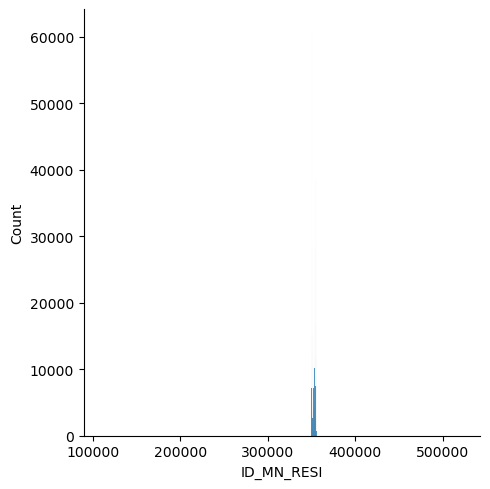

<Figure size 2000x2000 with 0 Axes>

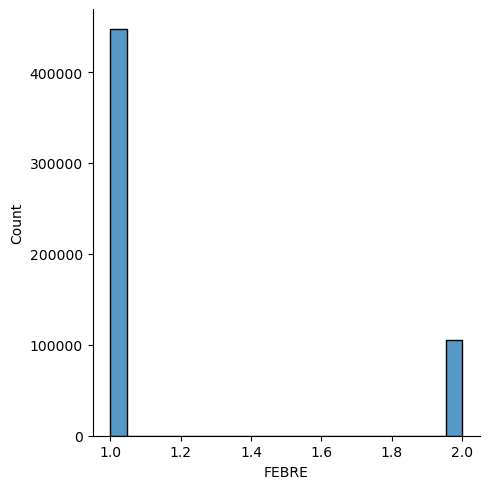

<Figure size 2000x2000 with 0 Axes>

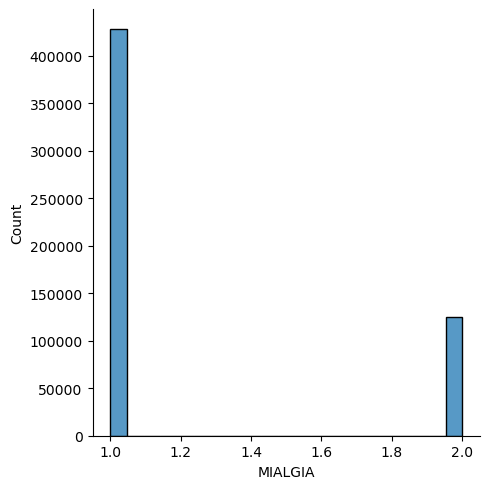

<Figure size 2000x2000 with 0 Axes>

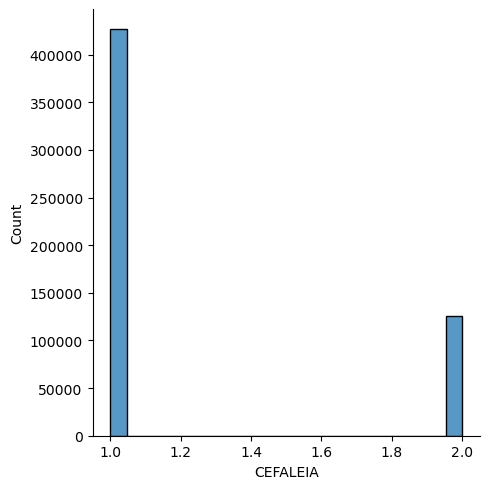

<Figure size 2000x2000 with 0 Axes>

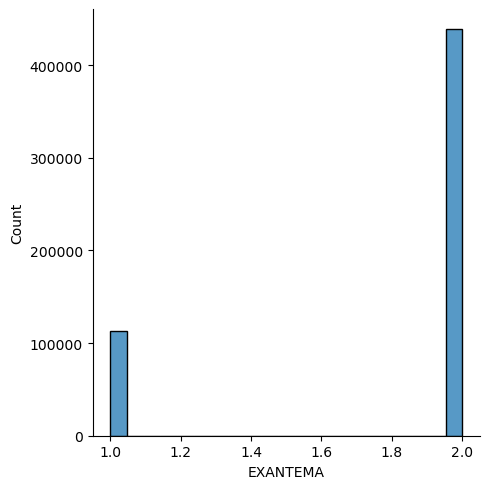

<Figure size 2000x2000 with 0 Axes>

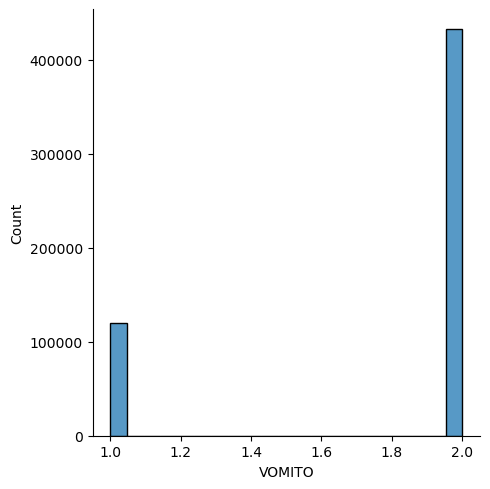

<Figure size 2000x2000 with 0 Axes>

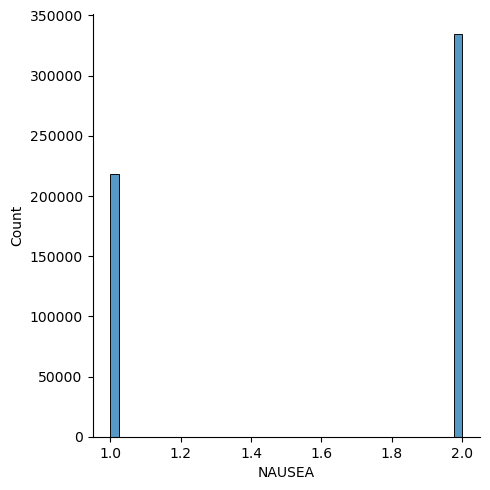

<Figure size 2000x2000 with 0 Axes>

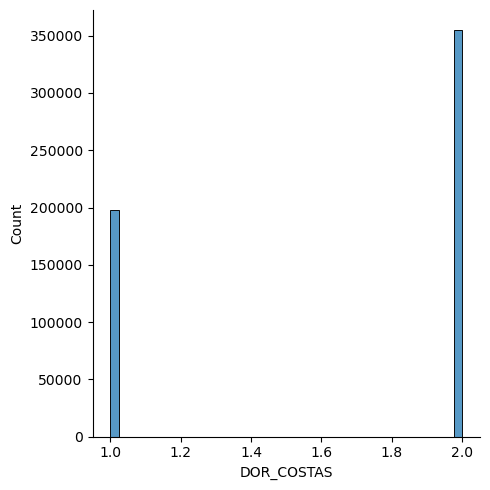

<Figure size 2000x2000 with 0 Axes>

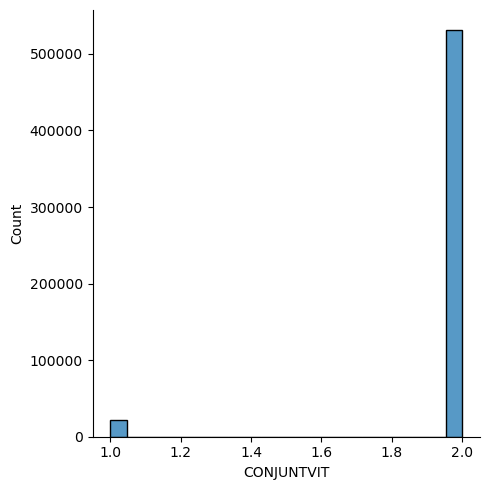

<Figure size 2000x2000 with 0 Axes>

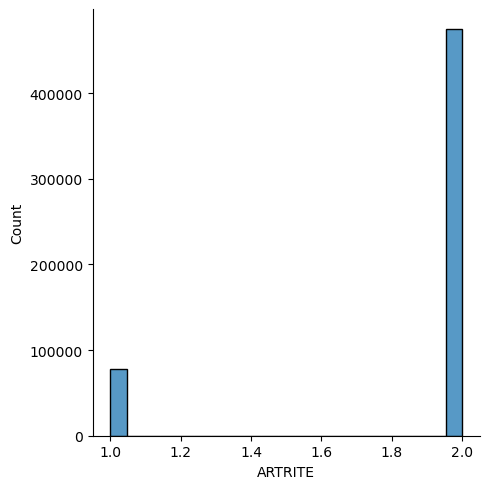

<Figure size 2000x2000 with 0 Axes>

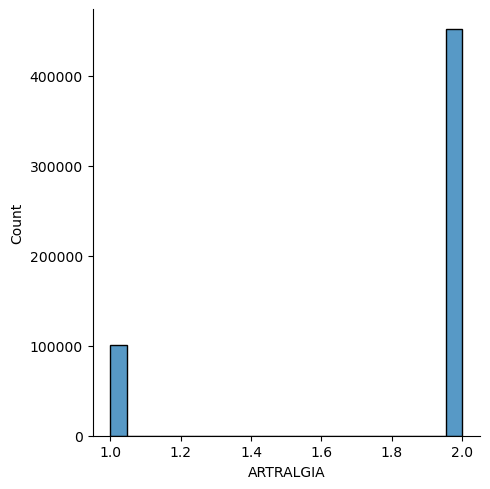

<Figure size 2000x2000 with 0 Axes>

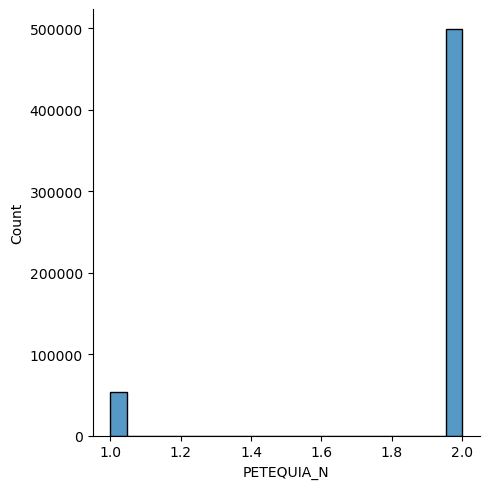

<Figure size 2000x2000 with 0 Axes>

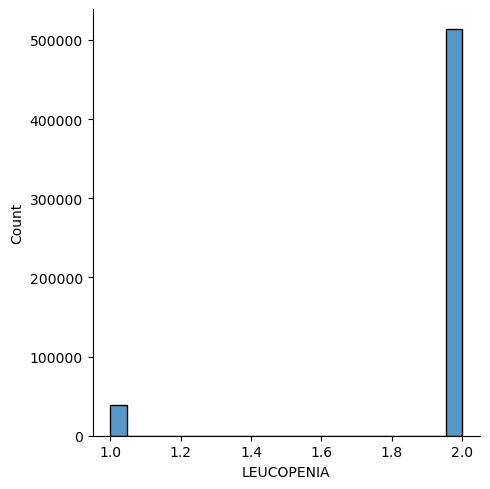

<Figure size 2000x2000 with 0 Axes>

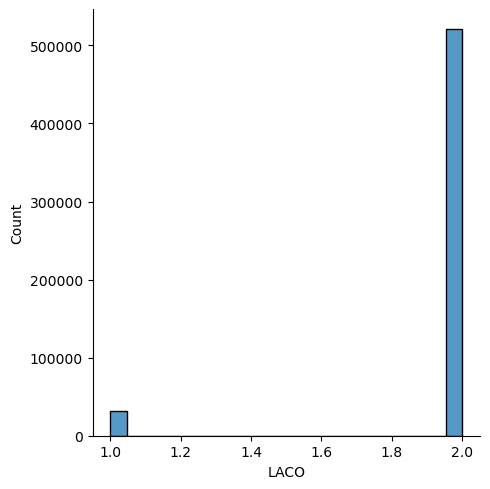

<Figure size 2000x2000 with 0 Axes>

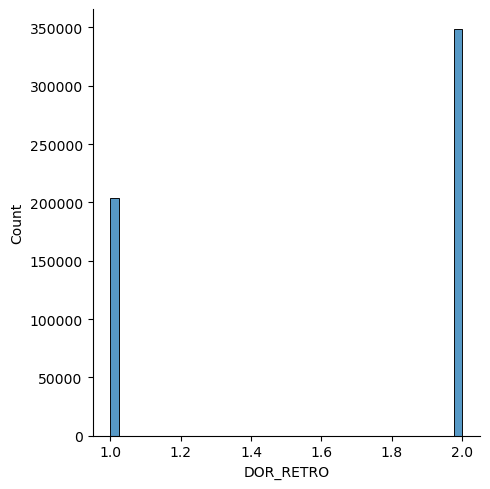

<Figure size 2000x2000 with 0 Axes>

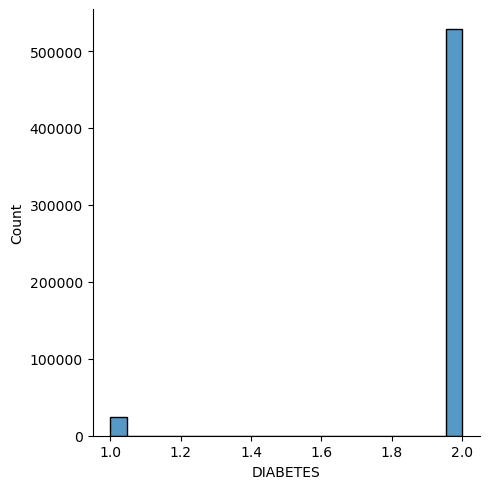

<Figure size 2000x2000 with 0 Axes>

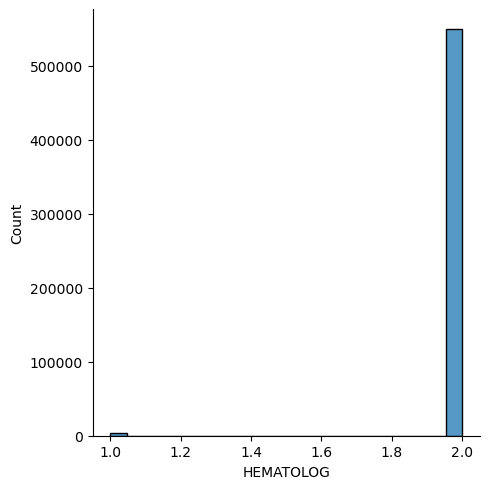

<Figure size 2000x2000 with 0 Axes>

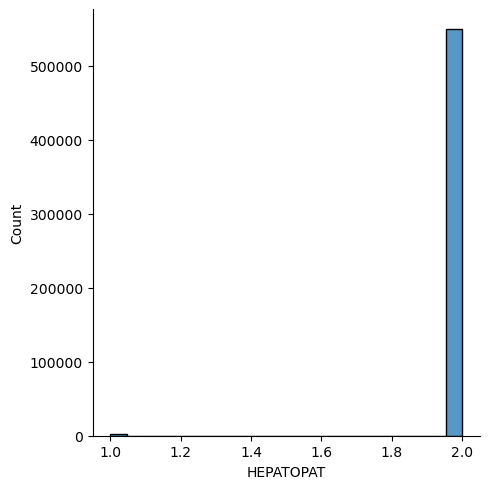

<Figure size 2000x2000 with 0 Axes>

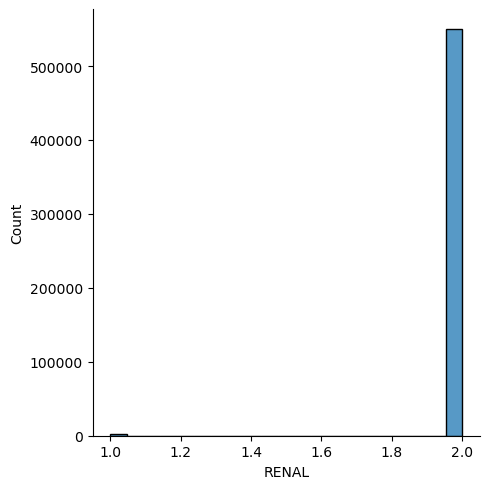

<Figure size 2000x2000 with 0 Axes>

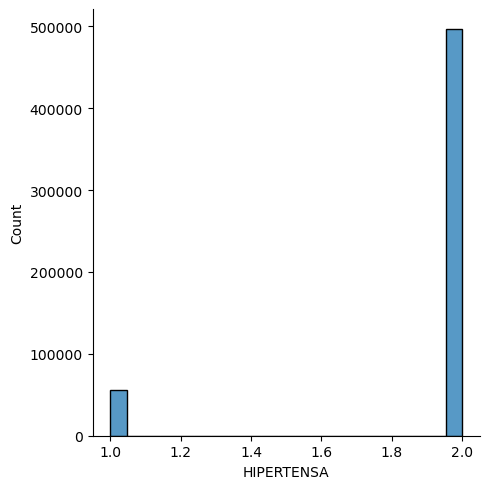

<Figure size 2000x2000 with 0 Axes>

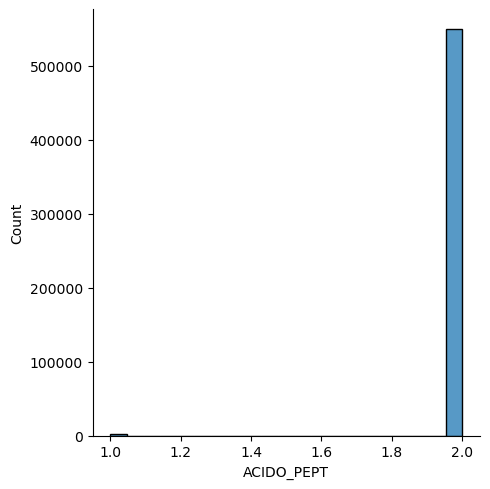

<Figure size 2000x2000 with 0 Axes>

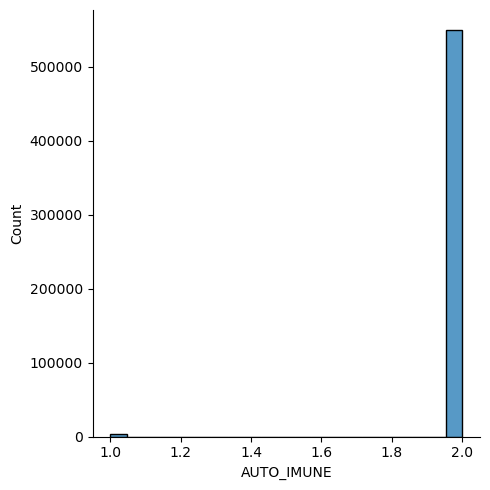

<Figure size 2000x2000 with 0 Axes>

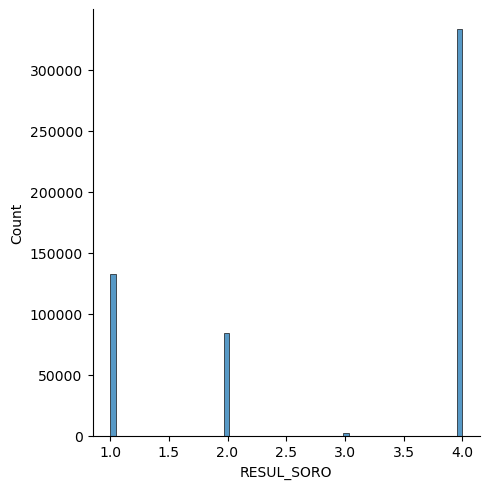

<Figure size 2000x2000 with 0 Axes>

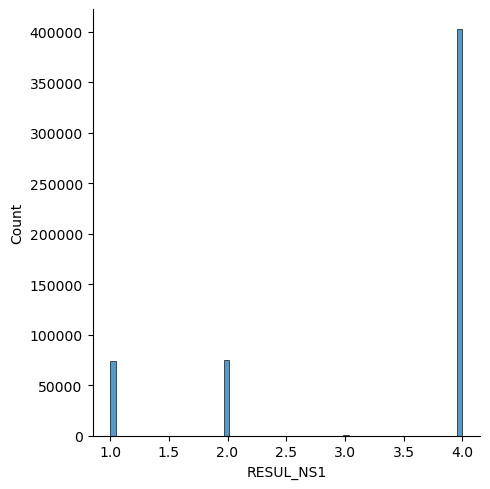

<Figure size 2000x2000 with 0 Axes>

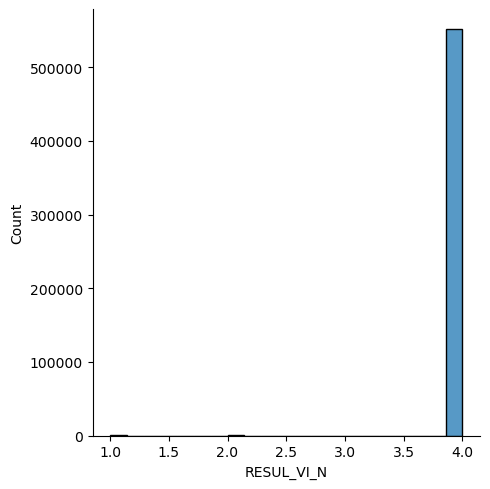

<Figure size 2000x2000 with 0 Axes>

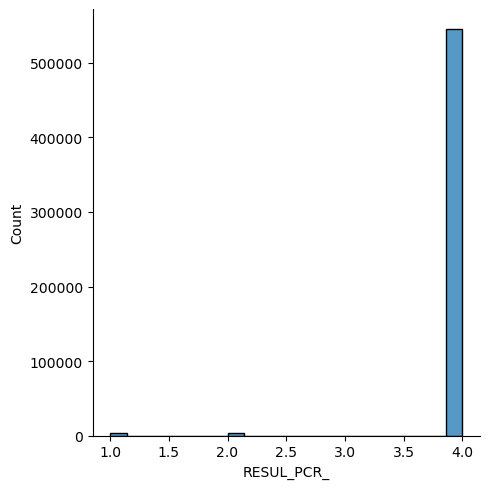

<Figure size 2000x2000 with 0 Axes>

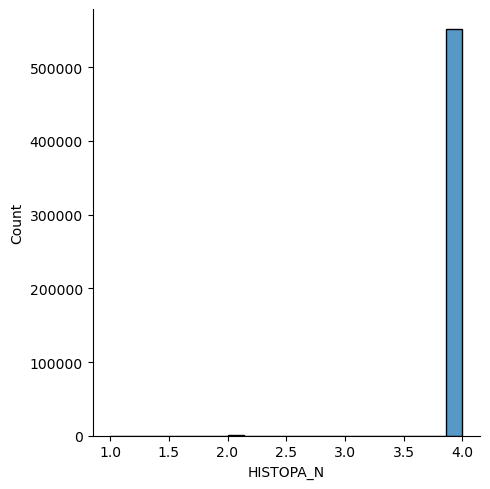

<Figure size 2000x2000 with 0 Axes>

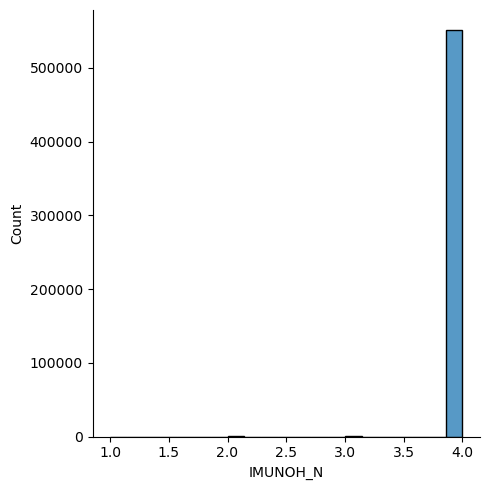

<Figure size 2000x2000 with 0 Axes>

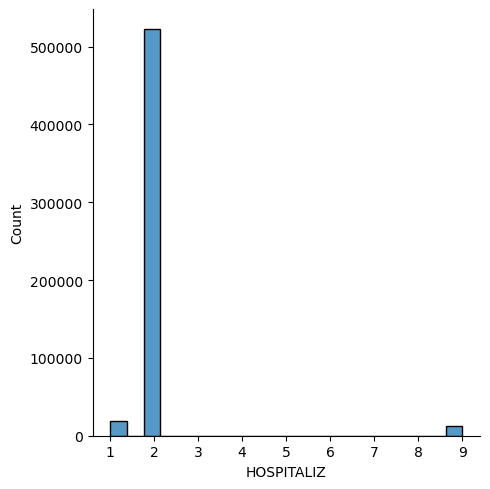

<Figure size 2000x2000 with 0 Axes>

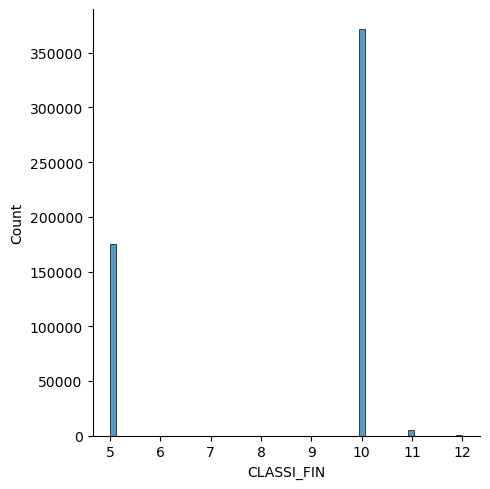

<Figure size 2000x2000 with 0 Axes>

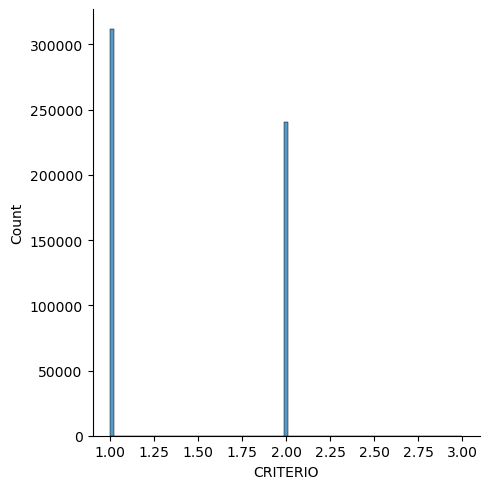

<Figure size 2000x2000 with 0 Axes>

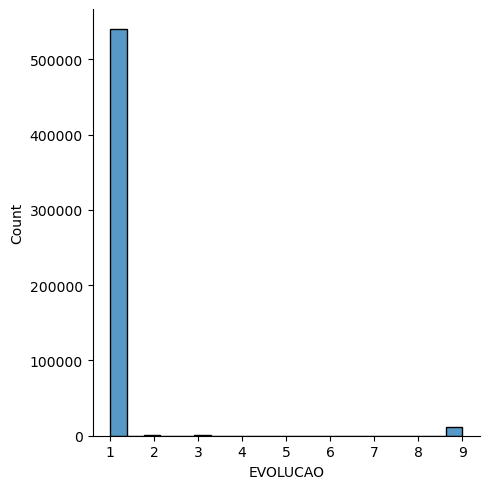

<Figure size 2000x2000 with 0 Axes>

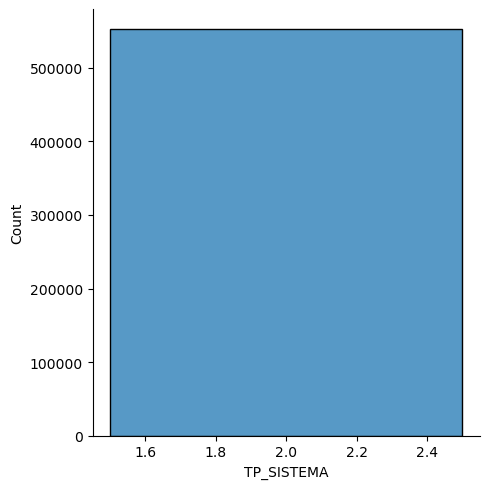

<Figure size 2000x2000 with 0 Axes>

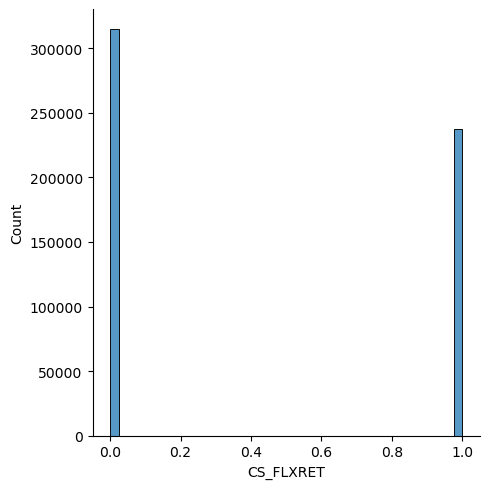

In [28]:
colunas = df_numeric.select_dtypes(include='number').columns
ncolunas = len(colunas)

for i in range(0,ncolunas):
 plt.figure(figsize=(20,20))
 sns.displot(x=colunas[i],data=df_numeric)
 plt.show()
 plt.close()

## 6.0 Data Modeling

In [35]:
# n_components         = 10
# pca                  = PCA(n_components=n_components)
# df_clean_reduzido   = pca.fit_transform(df_clean)
# df_clean_reduzido   = pd.DataFrame(df_clean_reduzido)

## 7.0 Data Preparing

## 8.0 ML Models

### 8.1 Traning

### 8.2 Validation

### 8.3 Measuring

### 8.4 Hyperparamerization

## 9.0 ML Models and Data Visualization